In [1]:
# %matplotlib inline
# %matplotlib notebook

import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
from mpl_toolkits import mplot3d as mpl3d
from matplotlib import cm
from scipy import signal
from scipy import stats
from scipy import linalg
from scipy import fft
from scipy import io

from IPython.core.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))

np.random.seed(123)

In [2]:
def round_power2(num):
    return int(np.power(2., np.ceil(np.log2(num))))


def signal_power(x):
    #     return np.var(x) # one can also use the variance, iff signal is zero mean
    return sum(abs(x)**2.0) / len(x)


def signal_power_dB(x):
    return 10. * np.log10(signal_power(x))


def snr(a, b):
    return signal_power(a) / signal_power(b)


def snr_dB(a, b):
    return 10. * np.log10(snr(a, b))

In [3]:
def mic_sig(n, fs, fc, fm, fd, dB=0.):
    t = np.arange(n) / fs
    x = np.exp(1.j *
               (2. * np.pi * fc * t + fd / fm * np.sin(2. * np.pi * fm * t)))
    x /= np.std(x)
    x *= 10.**(dB / 20.)
    return x


def awgn(n, dB=0.):
    w = 10.**(dB / 10.)
    d = stats.multivariate_normal(mean=[0., 0.],
                                  cov=[[.5 * w, 0.], [0., .5 * w]])
    x = d.rvs(size=n).view(np.complex128).reshape(N)
    return x

In [4]:
N = round_power2(1e5)
fs = int(1e6)
fc = 1e5
fd = 15000.
fm = 3900.

sig = mic_sig(N, fs, fc=fc, fm=fm, fd=fd, dB=0.) 
# + mic_sig(
#     N, fs, fc=fc - 1e5, fm=fm + 1000, fd=fd, dB=0.) + mic_sig(
#         N, fs, fc=fc + 2e5, fm=fm + 1000, fd=fd, dB=-2.) + mic_sig(
#             N, fs, fc=fc - 3e5, fm=fm + 1000, fd=fd, dB=-2.)
# # sig = mic_sig(N, fs, fc=fc-1e5, fm=fm+1000, fd=fd, dB=3.)
# noise = awgn(N, dB=15.)
# both = sig + noise

print('Sample time %9.5fs' % (N / fs))
# print('Signal power: %4.2f dB' % (signal_power_dB(sig)))
# print('Noise power: %5.2f dB' % (signal_power_dB(noise)))
# print('SNR: %13.2f dB' % (snr_dB(sig, noise)))

Sample time   0.13107s


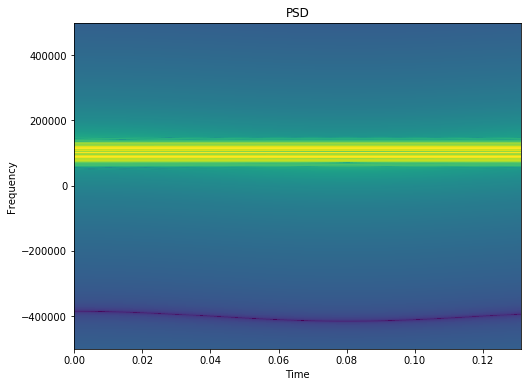

In [5]:
# Matplotlib Spectogram

# plt.figure(figsize=(8, 6))
# plt.specgram(noise,
#              NFFT=1024,
#              Fs=fs,
#              scale='dB',
#              cmap='viridis',
#              noverlap=0,
#              mode='psd',
#              window=signal.get_window('hann', 1024))
# plt.title("PSD")
# plt.xlabel("Time")
# plt.ylabel("Frequency")
# plt.show()

plt.figure(figsize=(8, 6))
plt.specgram(sig,
             NFFT=1024,
             Fs=fs,
             scale='dB',
             cmap='viridis',
             noverlap=0,
             mode='psd',
             window=signal.get_window('hann', 1024))
plt.title("PSD")
plt.xlabel("Time")
plt.ylabel("Frequency")
plt.show()

# plt.figure(figsize=(8, 6))
# plt.specgram(both,
#              NFFT=1024,
#              Fs=fs,
#              scale='dB',
#              cmap='viridis',
#              noverlap=0,
#              mode='psd',
#              window=signal.get_window('hann', 1024))
# plt.title("PSD")
# plt.xlabel("Time")
# plt.ylabel("Frequency")
# plt.show()

In [6]:
# Scipy Welch (Periodigram with averaging and overlap, which is currently 0)

# plt.figure(figsize=(8, 6))
# f, Pxx_den = signal.welch(noise,
#                           fs,
#                           nperseg=1024,
#                           noverlap=0,
#                           window='hann',
#                           scaling='density',
#                           detrend=False)
# plt.semilogy(fft.fftshift(f), fft.fftshift(Pxx_den))
# plt.xlabel('Frequency [Hz]')
# plt.ylabel('PSD [V**2/Hz]')
# plt.show()

# plt.figure(figsize=(8, 6))
# f, Pxx_den = signal.welch(sig,
#                           fs,
#                           nperseg=1024,
#                           noverlap=0,
#                           window='hann',
#                           scaling='density',
#                           detrend=False)
# plt.semilogy(fft.fftshift(f), fft.fftshift(Pxx_den))
# plt.xlabel('Frequency [Hz]')
# plt.ylabel('PSD [V**2/Hz]')
# plt.show()

# plt.figure(figsize=(8, 6))
# f, Pxx_den = signal.welch(both,
#                           fs,
#                           nperseg=1024,
#                           noverlap=0,
#                           window='hann',
#                           scaling='density',
#                           detrend=False)
# plt.semilogy(fft.fftshift(f), fft.fftshift(Pxx_den))
# plt.xlabel('Frequency [Hz]')
# plt.ylabel('PSD [V**2/Hz]')
# plt.show()

In [7]:
# Scipy Periodigram (Welch without averaging and 0 overlap)

# plt.figure(figsize=(8, 6))
# f, Pxx_den = signal.periodogram(noise,
#                                 fs,
#                                 window='hann',
#                                 nfft=1024,
#                                 scaling='density',
#                                 detrend=False)
# plt.semilogy(fft.fftshift(f), fft.fftshift(Pxx_den))
# plt.xlabel('frequency [Hz]')
# plt.ylabel('PSD [V**2/Hz]')
# plt.show()

# plt.figure(figsize=(8, 6))
# f, Pxx_den = signal.periodogram(sig,
#                                 fs,
#                                 window='hann',
#                                 nfft=1024,
#                                 scaling='density',
#                                 detrend=False)
# plt.semilogy(fft.fftshift(f), fft.fftshift(Pxx_den))
# plt.xlabel('frequency [Hz]')
# plt.ylabel('PSD [V**2/Hz]')
# plt.show()

# plt.figure(figsize=(8, 6))
# f, Pxx_den = signal.periodogram(both,
#                                 fs,
#                                 window='hann',
#                                 nfft=1024,
#                                 scaling='density',
#                                 detrend=False)
# plt.semilogy(fft.fftshift(f), fft.fftshift(Pxx_den))
# plt.xlabel('frequency [Hz]')
# plt.ylabel('PSD [V**2/Hz]')
# plt.show()

In [8]:
# Scipy Spectogram (Periodigram over time)

# plt.figure(figsize=(8, 6))
# f, t, Sxx = signal.spectrogram(noise,
#                                fs,
#                                return_onesided=False,
#                                window='boxcar',
#                                nperseg=1024,
#                                nfft=1024,
#                                noverlap=0,
#                                detrend=False,
#                                scaling='density',
#                                mode='psd')
# plt.pcolormesh(t,
#                fft.fftshift(f),
#                fft.fftshift(Sxx, axes=0),
#                shading='gouraud')
# plt.ylabel('Frequency [Hz]')
# plt.xlabel('Time [sec]')
# plt.show()

# plt.figure(figsize=(8, 6))
# f, t, Sxx = signal.spectrogram(sig,
#                                fs,
#                                return_onesided=False,
#                                window='boxcar',
#                                nperseg=1024,
#                                nfft=1024,
#                                noverlap=0,
#                                detrend=False,
#                                scaling='density',
#                                mode='psd')
# plt.pcolormesh(t,
#                fft.fftshift(f),
#                fft.fftshift(Sxx, axes=0),
#                shading='gouraud')
# plt.ylabel('Frequency [Hz]')
# plt.xlabel('Time [sec]')
# plt.show()

# plt.figure(figsize=(8, 6))
# f, t, Sxx = signal.spectrogram(both,
#                                fs,
#                                return_onesided=False,
#                                window='boxcar',
#                                nperseg=1024,
#                                nfft=1024,
#                                noverlap=0,
#                                detrend=False,
#                                scaling='density',
#                                mode='psd')
# plt.pcolormesh(t,
#                fft.fftshift(f),
#                fft.fftshift(Sxx, axes=0),
#                shading='gouraud')
# plt.ylabel('Frequency [Hz]')
# plt.xlabel('Time [sec]')
# plt.show()

In [9]:
def get_fft_psd(sig, fs, N):
    assert N == len(sig) 
    f_tmp = fft.fftfreq(N, 1. / fs)
    f = fft.fftshift(f_tmp)
    x_tmp = fft.fft(sig)
    x = fft.fftshift(x_tmp)
    x = np.abs(x)**2. / (N * fs)
    return f, x


def get_energy_from_psd(psd):
    return np.sum(psd)


def get_power_from_psd(psd, f):
    df = f[1] - f[0]
    return np.sum(psd) * df

Signal power in time 1.000000
Signal energy in time from signal power in time 0.131072


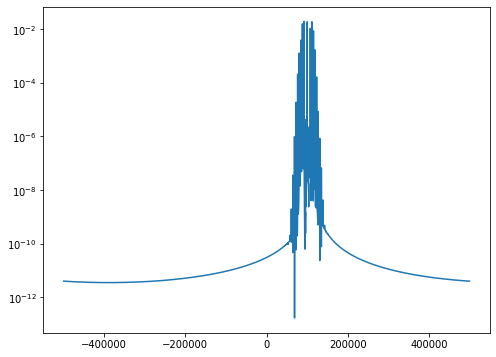

<Figure size 576x432 with 0 Axes>

Signal power from psd 1.000000
Signal energy from psd 0.131072


0.13107000003084252

In [10]:
power_sig_time = signal_power(sig)
energy_sig_time_from_power_sig_time = power_sig_time * N * 1. / fs  # where 1./fs=dt and T=(N*1./fs)
print('Signal power in time %8.6f' % (power_sig_time))
print('Signal energy in time from signal power in time %8.6f' %
      (energy_sig_time_from_power_sig_time))

plt.figure(figsize=(8, 6))
f, psd = get_fft_psd(sig, fs, N)
plt.semilogy(f, psd)
plt.show()
plt.figure(figsize=(8, 6))
# psd_log = 10. * np.log10(psd)
# psd_log = psd
# plt.plot(f, psd_log)
plt.show()

print('Signal power from psd %8.6f' % (get_power_from_psd(psd, f)))
print('Signal energy from psd %8.6f' % (get_energy_from_psd(psd)))

get_power_from_psd(psd, f) * 0.13107

In [11]:
# window_size = 1024

# sig1 = sig[0:1024]
# plt.figure(figsize=(8, 6))
# f_welch, psd_welch = signal.welch(sig1,
#                                   fs,
#                                   window='flattop',
#                                   nperseg=window_size,
#                                   noverlap=0,
#                                   nfft=window_size,
#                                   detrend=False,
#                                   scaling='density',
#                                   return_onesided=False)
# f_welch = fft.fftshift(f_welch)
# psd_welch = fft.fftshift(psd_welch)
# plt.figure(figsize=(8, 6))
# # plt.semilogy(f_welch, psd_welch)
# plt.plot(f_welch, psd_welch)
# plt.show()

# df_welch = f_welch[1] - f_welch[0]
# welch_power = np.sum(psd_welch) * df_welch
# print('Signal power from welch %8.6f' % (welch_power))

# welch_energy = welch_power * 1./fs * window_size
# print('Signal energy from welch %8.6f' % (welch_energy))

In [12]:

class Stft:
    
    def __init__(self, n=1024, window='flattop'):
        assert self.is_power2(n)
        self.n = n
        self.window = signal.get_window(window, self.n)
        
    def is_power2(self, n):
        '''Check least significant bit for power of two.'''
        return (n != 0) and (n & (n-1) == 0)
    
    def fft(self, sig, fs):
        '''Compute FFT and spectrum shifted to natural order.'''
        dt = 1./fs
        f = fft.fftshift(fft.fftfreq(len(sig), dt))
        s = fft.fftshift(fft.fft(sig))
        return f, s

    def apply_window(self, sig):
        return sig * self.window
    
    def stft_helper(self, sig, fs):
        return self.fft(self.apply_window(sig), fs)
    
    def stft(self, sig, fs):
        segs = [sig[i:i + self.n] for i in range(0, len(sig), self.n)]
        for i in segs:
            f, x = self.stft_helper(i, fs)
            yield f, x
            
    def apply_psd(self, sig, fs):
#         return np.abs(sig)**2. / (len(sig) * fs)
        return np.abs(sig)**2. / (fs * (self.window**2).sum())

    def dB(self, psd):
        return 10. * np.log10(psd)

    def psd(self, sig, fs):
        for f, x in self.stft(sig, fs):
            yield f, self.apply_psd(x, fs)
        
    def spectogram(self, sig, fs, dB=True):
        tl = list()
        xl = list()
        i = 0
        for f, x in self.psd(sig, fs):
            tl.append(i*self.n*1./fs)
            i += 1
            if dB:
                xl.append(self.dB(x))
            else:
                xl.append(x)
        xl = np.swapaxes(xl, 0, 1)
        return f, tl, xl


sft = Stft(n=1024, window='flattop')
f, t, x = sft.spectogram(both, fs, False)

plt.figure(figsize=(8, 6))
plt.semilogy(f, x[:, 2])
# plt.plot(f, x[:, 2])
# plt.plot(150000, 10e-14, 'x')
plt.show()

# plt.figure(figsize=(8, 6))
# plt.pcolormesh(t,
#                f,
#                x,
#                shading='flat',
#                cmap='viridis',
#                snap=True,
#                vmin=np.min(x),
#                vmax=np.max(x))
# plt.title('STFT Magnitude')
# plt.ylabel('Frequency [Hz]')
# plt.xlabel('Time [sec]')
# plt.show()

NameError: name 'both' is not defined

In [ ]:
class ED:
        
    def __init__(self, num_bands, fs, fft_len, f):
        self.num_bands = num_bands
        self.fft_len = fft_len
        self.di = fft_len / num_bands
        self.df = f[1] - f[0]
        self.fs = fs
        self.f = f
        assert self.df == (self.fs/self.fft_len)
        
    def energy(self, ps):
        return np.sum(np.abs(ps) ** 2)/self.fs
    
    def segs(self, ps):
        f_segs = list()
        ps_segs = list()
        for i in range(int(self.num_bands)):
            idx1 = int(i*self.di)
            idx2 = int((i+1)*self.di)
            f_segs.append(self.f[idx1:idx2])
            ps_segs.append(ps[idx1:idx2])
        return f_segs, ps_segs
    
    def detect(self, ps):
        f_segs, ps_segs = self.segs(ps)
        en_segs = list()
        for i in range(int(self.num_bands)):
            plt.figure(figsize=(8, 6))
            plt.semilogy(f_segs[i], ps_segs[i])
            plt.show()
            en_segs.append(self.energy(ps_segs[i]))
        return en_segs
    
    
ed = ED(num_bands=8, fs=fs, fft_len=1024, f=f)
en = ed.detect(x[:, 2])

plt.figure(figsize=(8, 6))
plt.plot(en)
plt.show()

In [ ]:
import scipy.ndimage

def clip_2d(x, lim_min, lim_max):
    (x, y) = np.shape(Sxx)
    for i in range(x):
        for j in range(y):
            Sxx[i, j] = max(min(Sxx[i, j], lim_max), lim_min)
    return Sxx

def smooth_2d(x, sigma):
    return scipy.ndimage.filters.gaussian_filter(x, [sigma, sigma], mode='mirror')

def crop_2d(Sxx, f, t, n):
    Sxx = Sxx[n:-n, n:-n]
    f = f[n:-n]
    t = t[n:-n]
    return Sxx, f, t

In [ ]:
f, t, Sxx = signal.spectrogram(both, fs, return_onesided=False, window='hann', nperseg=1024, nfft=1024, noverlap=0, detrend=False, scaling='density', mode='psd')

f = fft.fftshift(f)
Sxx = fft.fftshift(Sxx, axes=0)

Sxx = 10.0*np.log10(Sxx)
Sxx = clip_2d(Sxx, -60, 0)
Sxx = smooth_2d(Sxx, 2)
# Sxx, f, t = crop_2d(Sxx, f, t, 4)

fig = plt.figure(figsize=(12,12))
ax = fig.gca(projection='3d')
# ax.get_proj = lambda: np.dot(mpl3d.axes3d.Axes3D.get_proj(ax), np.diag([1, 1, 0.5, 1]))
ax.plot_surface(f[:, None], t[None, :], Sxx, cmap='viridis', rstride=1, cstride=1, alpha=1, antialiased=True)
ax.view_init(elev=30, azim=70)
plt.show()
plt.savefig('test.png')  